In [1]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [10]:
#Question 1
kbbdata=pd.read_csv('../data/KelleyBlueBookData.csv')
kbbdata.sample(10)

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
69,21831.82292,25564,Buick,Park Avenue,Sedan 4D,Sedan,6,3.8,4,1,1,1
712,30443.87990,15050,SAAB,9_5,Linear Wagon 4D,Wagon,4,2.3,4,1,0,1
654,30731.94165,22479,SAAB,9_3 HO,Aero Conv 2D,Convertible,4,2.0,2,1,0,0
53,21575.45683,20137,Buick,Lesabre,Limited Sedan 4D,Sedan,6,3.8,4,1,1,0
479,20221.80881,26223,Chevrolet,Monte Carlo,SS Coupe 2D,Coupe,6,3.8,2,1,1,1
225,11726.00297,23103,Chevrolet,Cavalier,Coupe 2D,Coupe,4,2.2,2,0,1,1
333,14194.82360,9561,Chevrolet,Cobalt,Sedan 4D,Sedan,4,2.2,4,0,1,1
85,43892.46788,23371,Cadillac,CST-V,Sedan 4D,Sedan,8,5.7,4,1,0,1
292,13135.90503,21796,Chevrolet,Cobalt,Coupe 2D,Coupe,4,2.2,2,1,1,1
764,14739.06724,1737,Saturn,Ion,Sedan 4D,Sedan,4,2.2,4,0,0,1


In [3]:
kbbdata['Type'] = kbbdata['Type'].astype('category')
kbbdata['Cylinder'] = kbbdata['Cylinder'].astype('category')
kbbdata = sm.add_constant(kbbdata)
formula = 'Price ~ Mileage + C(Type) + C(Cylinder) + Liter + Cruise + Sound + Leather'
model = smf.ols(formula=formula, data=kbbdata).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     202.6
Date:                Sun, 29 Sep 2024   Prob (F-statistic):          1.51e-221
Time:                        16:01:02   Log-Likelihood:                -7998.0
No. Observations:                 804   AIC:                         1.602e+04
Df Residuals:                     792   BIC:                         1.608e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             2.943e+04 

In [11]:
full_model = smf.ols(formula='Price ~ Mileage + C(Type) + C(Cylinder) + Liter + Cruise + Sound + Leather', data=kbbdata).fit()

reduced_model = smf.ols(formula='Price ~ Mileage + C(Type) + Liter + Cruise + Sound + Leather', data=kbbdata).fit()

anova_results = sm.stats.anova_lm(reduced_model, full_model)

print("ANOVA Results for the F-test:")
print(anova_results)


ANOVA Results for the F-test:
   df_resid           ssr  df_diff       ss_diff           F        Pr(>F)
0     794.0  2.592209e+10      0.0           NaN         NaN           NaN
1     792.0  2.057353e+10      2.0  5.348559e+09  102.949252  1.807044e-40


In [12]:
# Question 2
iccdata=pd.read_csv('../data/IceCreamConsumption.csv')
iccdata.sample(10)

,cons,income,price,temp,time
24,0.309,95,0.282,28,25
11,0.298,85,0.270,26,12
8,0.269,76,0.265,32,9
27,0.416,96,0.265,52,28
18,0.386,84,0.277,67,19
7,0.288,79,0.267,47,8
16,0.470,80,0.280,72,17
0,0.386,78,0.270,41,1
17,0.443,78,0.277,72,18
20,0.319,85,0.292,44,21


In [13]:
predictor_corr = iccdata[['income', 'price', 'temp']].corr()
print('Predictor Correlations:')
print(predictor_corr)


Predictor Correlations:
          income     price      temp
income  1.000000 -0.107479 -0.324709
price  -0.107479  1.000000 -0.108206
temp   -0.324709 -0.108206  1.000000


In [15]:
from statsmodels.formula.api import ols

def regression_model(predictors, data):
    formula = 'cons ~ ' + ' + '.join(predictors)
    model = ols(formula, data=data).fit()
    coefs = model.params
    std_errs = model.bse
    return coefs, std_errs

coefs_income, std_errs_income = regression_model(['income'], iccdata)
coefs_price, std_errs_price = regression_model(['price'], iccdata)
coefs_temp, std_errs_temp = regression_model(['temp'], iccdata)


coefs_all, std_errs_all = regression_model(['income', 'price', 'temp'], iccdata)

print(f"Coefficient for income (individual): {coefs_income['income']:.4f}, Standard Error: {std_errs_income['income']:.4f}")
print(f"Coefficient for price (individual): {coefs_price['price']:.4f}, Standard Error: {std_errs_price['price']:.4f}")
print(f"Coefficient for temp (individual): {coefs_temp['temp']:.4f}, Standard Error: {std_errs_temp['temp']:.4f}")

print(f"Coefficient for income (multiple): {coefs_all['income']:.4f}, Standard Error: {std_errs_all['income']:.4f}")
print(f"Coefficient for price (multiple): {coefs_all['price']:.4f}, Standard Error: {std_errs_all['price']:.4f}")
print(f"Coefficient for temp (multiple): {coefs_all['temp']:.4f}, Standard Error: {std_errs_all['temp']:.4f}")


Coefficient for income (individual): 0.0005, Standard Error: 0.0020
Coefficient for price (individual): -2.0472, Standard Error: 1.4393
Coefficient for temp (individual): 0.0031, Standard Error: 0.0005
Coefficient for income (multiple): 0.0033, Standard Error: 0.0012
Coefficient for price (multiple): -1.0444, Standard Error: 0.8344
Coefficient for temp (multiple): 0.0035, Standard Error: 0.0004


In [16]:
def calculate_vif(target_predictor, data):
    predictors = ['income', 'price', 'temp']
    other_predictors = [p for p in predictors if p != target_predictor]
    formula = f"{target_predictor} ~ " + ' + '.join(other_predictors)
    model = ols(formula, data=data).fit()
    r_squared = model.rsquared
    vif = 1 / (1 - r_squared)
    return vif

vif_income = calculate_vif('income', iccdata)
vif_price = calculate_vif('price', iccdata)
vif_temp = calculate_vif('temp', iccdata)

print(f"VIF for income: {vif_income:.4f}")
print(f"VIF for price: {vif_price:.4f}")
print(f"VIF for temp: {vif_temp:.4f}")


VIF for income: 1.1442
VIF for price: 1.0357
VIF for temp: 1.1444


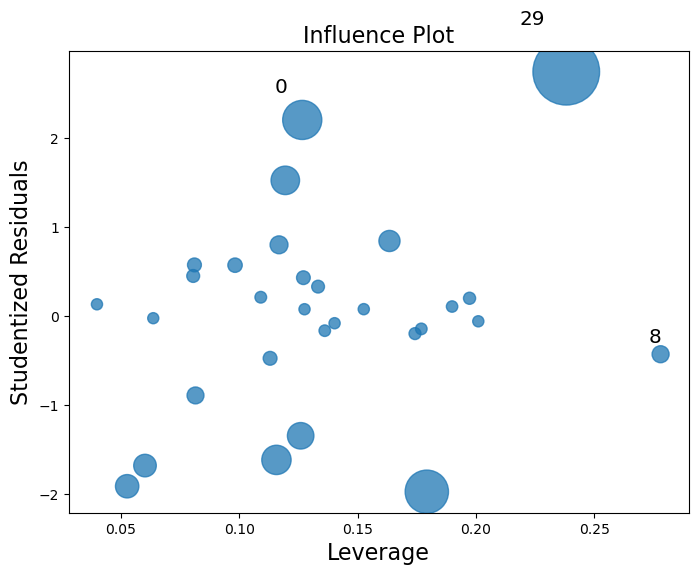

In [17]:
model = smf.ols('cons ~ income + price + temp', data=iccdata).fit()

fig, ax = plt.subplots(figsize=(8, 6))
sm.graphics.influence_plot(model, ax=ax, criterion="cooks")

plt.show()


In [19]:
# Question 3
bpdata=pd.read_csv('../data/BrandPreference.csv')
bpdata.sample(10)

,BrandLiking,MoistureContent,Sweetness
3,76,4,4
8,83,8,2
10,86,8,2
9,89,8,4
1,73,4,4
11,93,8,4
5,80,6,4
7,83,6,4
13,95,10,4
12,88,10,2


In [20]:
model = smf.ols('BrandLiking ~ MoistureContent + Sweetness', data=bpdata).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            BrandLiking   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     129.1
Date:                Sun, 29 Sep 2024   Prob (F-statistic):           2.66e-09
Time:                        16:38:04   Log-Likelihood:                -36.894
No. Observations:                  16   AIC:                             79.79
Df Residuals:                      13   BIC:                             82.11
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          37.6500      2.996     

/opt/homebrew/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  res = hypotest_fun_out(*samples, **kwds)


In [22]:
fitted_value_first_obs = model.fittedvalues[0]

fitted_value_first_obs


64.1

In [24]:
X = model.model.exog
y = model.model.endog

hat_matrix = X @ np.linalg.inv(X.T @ X) @ X.T

h_first_row = hat_matrix[0, :]

fitted_value_hat_matrix = np.sum(h_first_row * y)

fitted_value_hat_matrix


64.10000000000026

In [25]:
hat_matrix

array([[ 0.2375,  0.1125,  0.2375,  0.1125,  0.1625,  0.0375,  0.1625,
         0.0375,  0.0875, -0.0375,  0.0875, -0.0375,  0.0125, -0.1125,
         0.0125, -0.1125],
       [ 0.1125,  0.2375,  0.1125,  0.2375,  0.0375,  0.1625,  0.0375,
         0.1625, -0.0375,  0.0875, -0.0375,  0.0875, -0.1125,  0.0125,
        -0.1125,  0.0125],
       [ 0.2375,  0.1125,  0.2375,  0.1125,  0.1625,  0.0375,  0.1625,
         0.0375,  0.0875, -0.0375,  0.0875, -0.0375,  0.0125, -0.1125,
         0.0125, -0.1125],
       [ 0.1125,  0.2375,  0.1125,  0.2375,  0.0375,  0.1625,  0.0375,
         0.1625, -0.0375,  0.0875, -0.0375,  0.0875, -0.1125,  0.0125,
        -0.1125,  0.0125],
       [ 0.1625,  0.0375,  0.1625,  0.0375,  0.1375,  0.0125,  0.1375,
         0.0125,  0.1125, -0.0125,  0.1125, -0.0125,  0.0875, -0.0375,
         0.0875, -0.0375],
       [ 0.0375,  0.1625,  0.0375,  0.1625,  0.0125,  0.1375,  0.0125,
         0.1375, -0.0125,  0.1125, -0.0125,  0.1125, -0.0375,  0.0875,
        -0.03